### Load & Explore the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = 'ab_testing.csv'

In [4]:
import pandas as pd
df = pd.read_csv(file_path)
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [5]:
#Understanding the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [6]:
# Check for missing values
df.isnull().sum()

,0
User ID,0
Group,0
Page Views,0
Time Spent,0
Conversion,0
Device,0
Location,0


In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# Summary of Dataset
df[['Page Views','Time Spent']].describe()

,Page Views,Time Spent
count,5000.000000,5000.000000
mean,7.537600,242.512600
std,4.022465,118.254153
min,1.000000,40.000000
25%,4.000000,137.000000
50%,8.000000,243.000000
75%,11.000000,346.000000
max,14.000000,449.000000


In [9]:
# converting the categorical values to numbers
# handling the values of column "Group" into numbers
df['Group'] = df['Group'].map({'A':1,'B':0})

# handling the values of column "conversion" into numbers
df['Conversion'] = df['Conversion'].map({'No':0,'Yes':1})

df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,0,3,424,0,Mobile,Northern Ireland
1,11682,1,9,342,0,Mobile,Scotland
2,19825,1,2,396,0,Desktop,Northern Ireland
3,16080,0,4,318,0,Desktop,Wales
4,18851,1,1,338,1,Desktop,Scotland


In [10]:
# find uniques values in the column device
df['Device'].unique()

array(['Mobile', 'Desktop'], dtype=object)

In [11]:
# handling the values of the column "Device" into numbers
df['Device'] = df['Device'].map({'Mobile':1,'Desktop':0})
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,0,3,424,0,1,Northern Ireland
1,11682,1,9,342,0,1,Scotland
2,19825,1,2,396,0,0,Northern Ireland
3,16080,0,4,318,0,0,Wales
4,18851,1,1,338,1,0,Scotland


In [12]:
df['Location'].unique()

array(['Northern Ireland', 'Scotland', 'Wales', 'England'], dtype=object)

In [13]:
# handling the values of the column "Location" into numbers asa there are only 4 countries in the list ['Northern Ireland', 'Scotland', 'Wales', 'England']
df['Location'] = df['Location'].map({'Northern Ireland':0,'Scotland':1,'Wales':2,'England':3})
df.head()


,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,0,3,424,0,1,0
1,11682,1,9,342,0,1,1
2,19825,1,2,396,0,0,0
3,16080,0,4,318,0,0,2
4,18851,1,1,338,1,0,1


In [14]:
df.describe()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,14925.159000,0.503800,7.537600,242.512600,0.097000,0.492400,1.49620
std,2869.153773,0.500036,4.022465,118.254153,0.295987,0.499992,1.11599
min,10001.000000,0.000000,1.000000,40.000000,0.000000,0.000000,0.00000
25%,12456.250000,0.000000,4.000000,137.000000,0.000000,0.000000,1.00000
50%,14858.500000,1.000000,8.000000,243.000000,0.000000,0.000000,1.00000
75%,17379.750000,1.000000,11.000000,346.000000,0.000000,1.000000,2.00000
max,19995.000000,1.000000,14.000000,449.000000,1.000000,1.000000,3.00000


Key Observations:

 * Conversion Rate (Mean: 0.097) → close to 9.7% of users converted.
 * Page Views (Mean: 7.54, Std: 4.02) → Users typically view 7-8 pages per session.
 * Time Spent (Mean: 242.5 sec, Std: 118.25 sec) → Users spend close to 4 minutes on the website.
 * Group Distribution (Mean: 0.5038) → Groups are balanced (~50% in each A/B group).

### Exploratory Data Analytics

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-16-425d2a3bd38a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Group', y='Page Views', ax=axes[0], palette='cubehelix')
<ipython-input-16-425d2a3bd38a>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['A (Control)', 'B (Treatment)'])
<ipython-input-16-425d2a3bd38a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Group', y='Time Spent', ax=axes[1], palette='cubehelix')
<ipython-input-16-425d2a3bd38a>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].

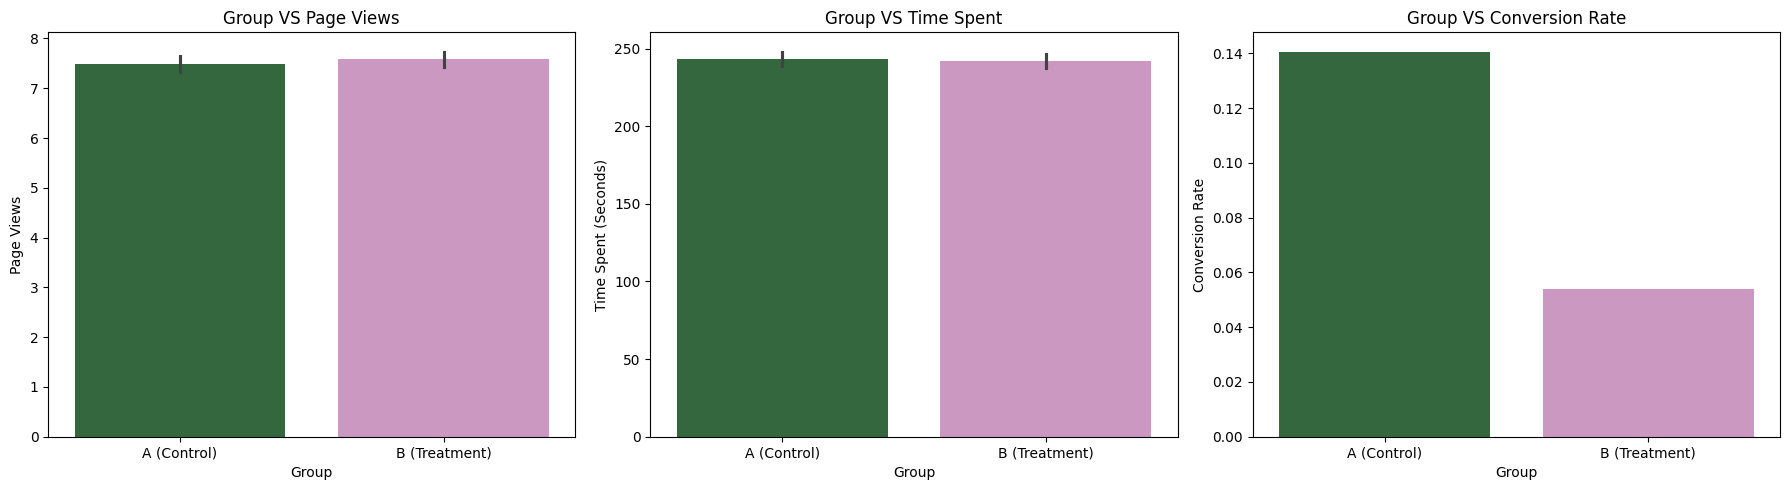

In [16]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Group VS Page Views
sns.barplot(data=df, x='Group', y='Page Views', ax=axes[0], palette='cubehelix')
axes[0].set_title('Group VS Page Views')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Page Views')
axes[0].set_xticklabels(['A (Control)', 'B (Treatment)'])

# Group VS Time Spent
sns.barplot(data=df, x='Group', y='Time Spent', ax=axes[1], palette='cubehelix')
axes[1].set_title('Group VS Time Spent')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('Time Spent (Seconds)')
axes[1].set_xticklabels(['A (Control)', 'B (Treatment)'])

# Group VS Conversion
conversion_rates = df.groupby('Group')['Conversion'].mean()
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, ax=axes[2], palette='cubehelix')
axes[2].set_title('Group VS Conversion Rate')
axes[2].set_xlabel('Group')
axes[2].set_ylabel('Conversion Rate')
axes[2].set_xticklabels(['A (Control)', 'B (Treatment)'])

# Show the plots
plt.tight_layout()
plt.show()

Group vs Page Views, Time Spent, and Conversion Rate

* Page Views & Time Spent:
  * There is no significant difference in average page views and time spent between Group A (Control) and Group B (Treatment).
  * This suggests that the treatment change did not impact user engagement in terms of browsing behavior.
* Conversion Rate:
  * Group A (Control) has a noticeably higher conversion rate than Group B (Treatment).
  * This suggests that the new version (Group B) might have negatively impacted conversions, which is a major concern.

<ipython-input-17-55bad554b300>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_time.index, y=conversion_time.values, ax=axes[0, 2], palette="magma")
<ipython-input-17-55bad554b300>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 2].set_xticklabels(['No Conversion', 'Converted'])
<ipython-input-17-55bad554b300>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_page_views.index, y=conversion_page_views.values, ax=axes[1, 0], palette="magma")
<ipython-input-17-55bad554b300>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_

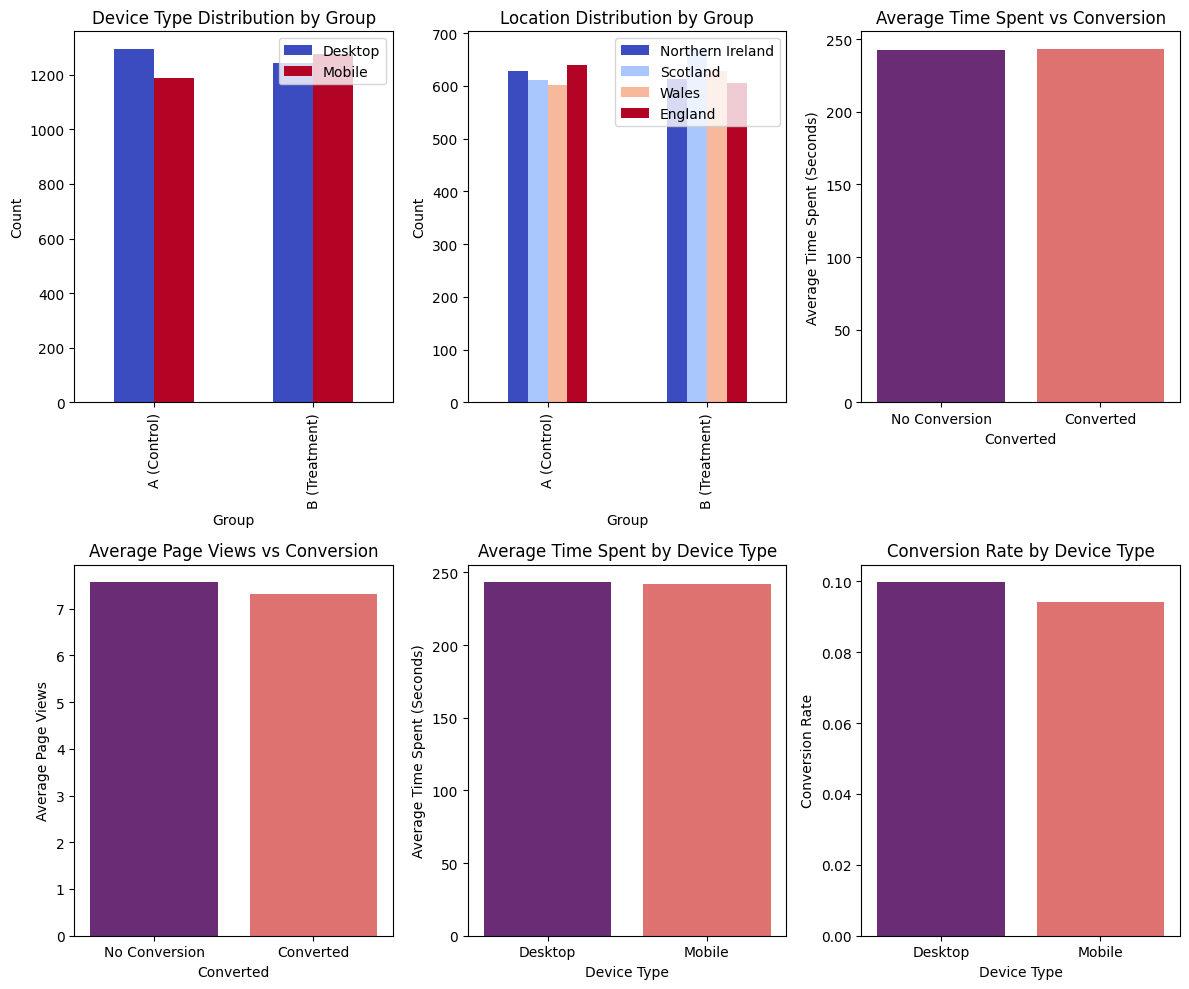

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for multiple plots
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

# 1️⃣ Group vs Device Type (Column Chart)
device_counts = df.groupby(['Group', 'Device']).size().unstack()
device_counts.plot(kind='bar', ax=axes[0, 0], colormap="coolwarm")
axes[0, 0].set_title("Device Type Distribution by Group")
axes[0, 0].set_xlabel("Group")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_xticklabels(['A (Control)', 'B (Treatment)'])
axes[0, 0].legend(["Desktop", "Mobile"])

# 2️⃣ Group vs Location (Column Chart)
location_counts = df.groupby(['Group', 'Location']).size().unstack()
location_counts.plot(kind='bar', ax=axes[0, 1], colormap="coolwarm")
axes[0, 1].set_title("Location Distribution by Group")
axes[0, 1].set_xlabel("Group")
axes[0, 1].set_ylabel("Count")
axes[0, 1].set_xticklabels(['A (Control)', 'B (Treatment)'])
axes[0, 1].legend(["Northern Ireland", "Scotland", "Wales", "England"])

# 3️⃣ Time Spent vs Conversion Rate (Bar Plot)
conversion_time = df.groupby('Conversion')['Time Spent'].mean()
sns.barplot(x=conversion_time.index, y=conversion_time.values, ax=axes[0, 2], palette="magma")
axes[0, 2].set_title("Average Time Spent vs Conversion")
axes[0, 2].set_xlabel("Converted")
axes[0, 2].set_ylabel("Average Time Spent (Seconds)")
axes[0, 2].set_xticklabels(['No Conversion', 'Converted'])

# 4️⃣ Page Views vs Conversion Rate (Bar Plot)
conversion_page_views = df.groupby('Conversion')['Page Views'].mean()
sns.barplot(x=conversion_page_views.index, y=conversion_page_views.values, ax=axes[1, 0], palette="magma")
axes[1, 0].set_title("Average Page Views vs Conversion")
axes[1, 0].set_xlabel("Converted")
axes[1, 0].set_ylabel("Average Page Views")
axes[1, 0].set_xticklabels(['No Conversion', 'Converted'])


# 6️⃣ Conversion vs Device Type (Bar Plot)
conversion_device = df.groupby('Device')['Conversion'].mean()
sns.barplot(x=conversion_device.index, y=conversion_device.values, ax=axes[1, 2], palette="magma")
axes[1, 2].set_title("Conversion Rate by Device Type")
axes[1, 2].set_xlabel("Device Type")
axes[1, 2].set_ylabel("Conversion Rate")
axes[1, 2].set_xticklabels(['Desktop', 'Mobile'])

# 7️⃣ Time Spent vs Device Type (Bar Plot)
time_spent_device = df.groupby('Device')['Time Spent'].mean()
sns.barplot(x=time_spent_device.index, y=time_spent_device.values, ax=axes[1, 1], palette="magma")
axes[1, 1].set_title("Average Time Spent by Device Type")
axes[1, 1].set_xlabel("Device Type")
axes[1, 1].set_ylabel("Average Time Spent (Seconds)")
axes[1, 1].set_xticklabels(['Desktop', 'Mobile'])

# Adjust layout
plt.tight_layout()
plt.show()


Device Type & Location Insights

* Device Type Distribution:
  * Both desktop and mobile users are almost evenly distributed across Group A and Group B, meaning there is no device-based bias in randomization.
* Location Distribution:
  * Users from different regions are evenly distributed between Group A and Group B.
  * This suggests that location does not impact the A/B test assignment.
* Conversion by Region:
  * England has the highest conversion rate, followed by Scotland, Wales, and Northern Ireland.
  * This suggests that regional behavior could influence conversion rates, and localized strategies might be beneficial.

<ipython-input-18-0053d4e23614>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_region.index, y=conversion_region.values, ax=axes[0], palette="coolwarm")
<ipython-input-18-0053d4e23614>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Northern Ireland", "Scotland", "Wales", "England"])
<ipython-input-18-0053d4e23614>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_spent_device.index, y=time_spent_device.values, ax=axes[1], palette="coolwarm")
<ipython-input-18-0053d4e23614>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.

[Text(0, 0, 'Desktop'), Text(1, 0, 'Mobile')]

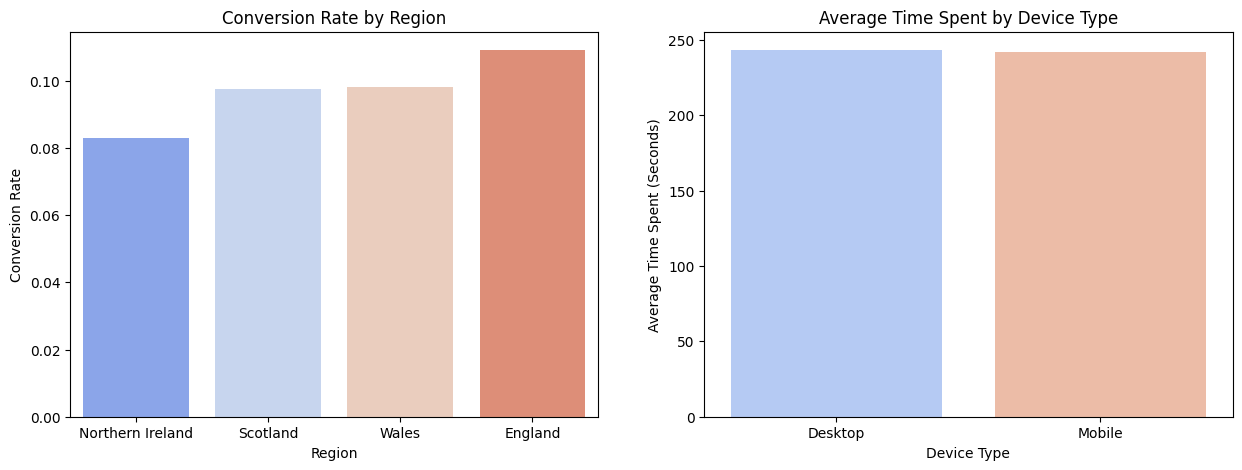

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

### Conversion vs Region
conversion_region = df.groupby("Location")["Conversion"].mean()
sns.barplot(x=conversion_region.index, y=conversion_region.values, ax=axes[0], palette="coolwarm")
axes[0].set_title("Conversion Rate by Region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Conversion Rate")
axes[0].set_xticklabels(["Northern Ireland", "Scotland", "Wales", "England"])

### Time Spent vs Device (Bar Plot)
time_spent_device = df.groupby("Device")["Time Spent"].mean()
sns.barplot(x=time_spent_device.index, y=time_spent_device.values, ax=axes[1], palette="coolwarm")
axes[1].set_title("Average Time Spent by Device Type")
axes[1].set_xlabel("Device Type")
axes[1].set_ylabel("Average Time Spent (Seconds)")
axes[1].set_xticklabels(["Desktop", "Mobile"])

Time Spent, Page Views, and Device Type Analysis

* Time Spent vs. Conversion Rate:
  * Users who convert spend slightly more time on the website than those who don’t, but the difference is not very large.
  * This suggests that time spent alone is not a strong predictor of conversion.
* Page Views vs. Conversion Rate:
  * Users who convert tend to view slightly more pages than those who don’t.
  * However, the difference is not substantial, indicating that higher page views alone don’t guarantee conversions.
* Time Spent by Device Type:
  * Mobile and desktop users spend almost the same amount of time on the website.
  * There is no strong indication that one device leads to longer engagement than the other.
* Conversion Rate by Device Type:
  * Desktop users have a slightly higher conversion rate than mobile users.
  * This suggests that the desktop experience might be better optimized than the mobile experience.

Text(0.5, 1.0, 'Correlation Matrix of A/B Testing Variables')

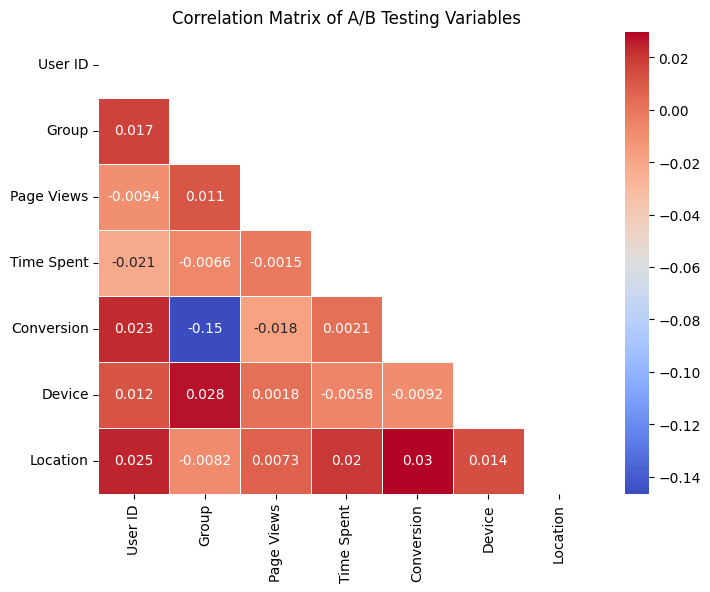

In [19]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
import numpy as np
# Create a mask to hide the diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5,mask=mask)
plt.title("Correlation Matrix of A/B Testing Variables")

* Group vs. Conversion (r = -0.15, weak negative correlation)

    Being in Group B (Treatment) is negatively correlated with conversion.
This aligns with our previous observations that the new version (B) might be performing worse than the control (A).

* Page Views & Time Spent (r ≈ 0.01, negligible correlation)
    No strong correlation between time spent and page views, suggesting that users do not necessarily spend more time when they browse more pages.

* Conversion vs. Time Spent & Page Views (r ≈ -0.018 and 0.002, negligible correlation)

    Users spending more time or viewing more pages does not significantly impact conversion. This means other factors (like page design, messaging, or CTA placement) might be driving conversions rather than just time spent or pages viewed.

* Device Type & Conversion (r = -0.009, negligible correlation)

    No strong link between device type and conversion rate.
This suggests that device type alone is not a major factor in determining whether a user converts.

### Thoughts after EDA:

version B seems to underperform so the business should revert back to A version

### Statistical Analysis for A/B testing

Chi-Squared Test:

The Chi-Square Test is used to determine whether there is a significant difference in conversion rates between Group A (Control) and Group B (Treatment).

Hypotheses:

Null Hypothesis (H₀): There is no significant difference in conversion rates between Group A and Group B.

Alternative Hypothesis (H₁): There is a significant difference in conversion rates between Group A and Group B.

In [20]:
import scipy.stats as stats
import pandas as pd

# Create contingency table
conversion_table = pd.crosstab(df['Group'], df['Conversion'])

# Perform Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(conversion_table)

# Print results
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates between Group A and Group B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in conversion rates between Group A and Group B.")


Chi-Square Statistic: 106.2281
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in conversion rates between Group A and Group B.


This confirms that Group A (Control) and Group B (Treatment) are converting users at different rates, but it does not tell us which group is performing better. From our EDA, we already saw that Group A has a higher conversion rate than Group B, meaning that the treatment (Group B) is performing worse than the original version.

T-Test

Before choosing a statistical test, we must determine if Time Spent follows a normal distribution.

If the data is normally distributed, we use a t-test.
If the data is not normally distributed, we use the Mann-Whitney U Test (a non-parametric alternative).
We will check normality using:

Histogram + KDE plot (visual check).
Shapiro-Wilk Test (statistical test).

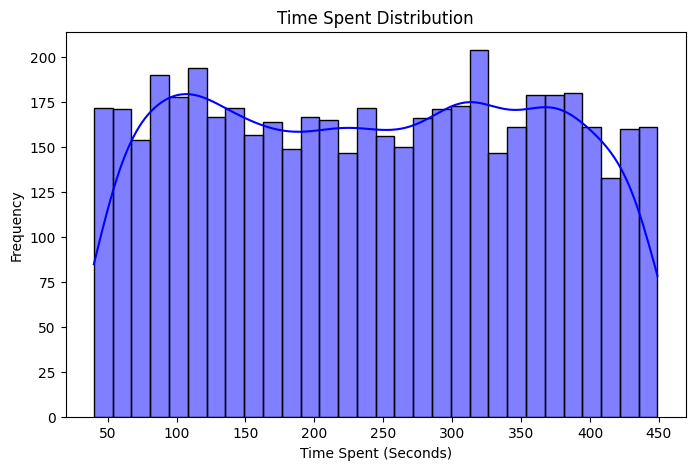

Shapiro-Wilk Test Statistic: 0.9532
P-value: 0.0000
Time Spent is NOT normally distributed (Use Mann-Whitney U Test)


In [21]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Visual Check: Histogram & KDE Plot
plt.figure(figsize=(8, 5))
sns.histplot(df["Time Spent"], kde=True, bins=30, color="blue")
plt.title("Time Spent Distribution")
plt.xlabel("Time Spent (Seconds)")
plt.ylabel("Frequency")
plt.show()

# Statistical Check: Shapiro-Wilk Test for Normality
shapiro_test = stats.shapiro(df["Time Spent"])

# Print Results
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}")
print(f"P-value: {shapiro_test.pvalue:.4f}")

# Interpretation
if shapiro_test.pvalue < 0.05:
    print("Time Spent is NOT normally distributed (Use Mann-Whitney U Test)")
else:
    print("Time Spent is normally distributed (Use t-test)")


In [23]:
# Extracting time spent for each group
group_A_time = df[df['Group'] == 1]['Time Spent']
group_B_time = df[df['Group'] == 0]['Time Spent']

# Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(group_A_time, group_B_time, alternative='two-sided')

# Print Results
print(f"Mann-Whitney U Statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in time spent between Group A and Group B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in time spent between Group A and Group B.")


Mann-Whitney U Statistic: 3101095.0000
P-value: 0.6420
Fail to reject the null hypothesis: There is no significant difference in time spent between Group A and Group B.


Since p-value > 0.05, we fail to reject the null hypothesis (H₀) and conclude that there is no significant difference in time spent between Group A and Group B.

This means that the treatment (Group B) did not impact the time users spent on the website, suggesting that any difference observed in the EDA was due to random variation rather than a real effect.



### Checking Normality of Page Views

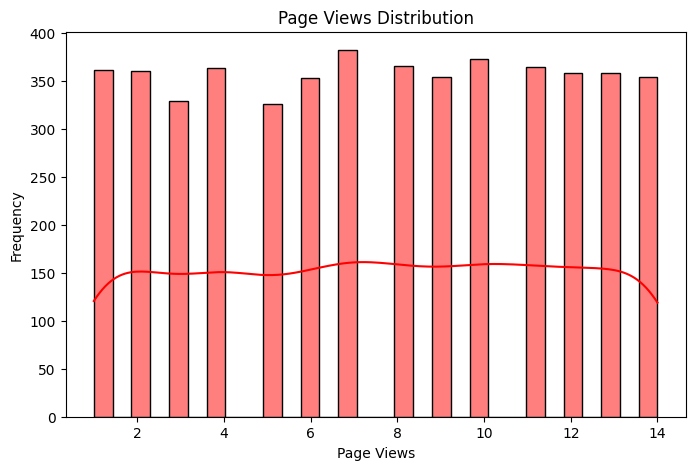

Shapiro-Wilk Test Statistic: 0.9451
P-value: 0.0000
Page Views is NOT normally distributed (Use Mann-Whitney U Test)


In [24]:

# Visual Check: Histogram & KDE Plot
plt.figure(figsize=(8, 5))
sns.histplot(df["Page Views"], kde=True, bins=30, color="red")
plt.title("Page Views Distribution")
plt.xlabel("Page Views")
plt.ylabel("Frequency")
plt.show()

# Statistical Check: Shapiro-Wilk Test for Normality
shapiro_test = stats.shapiro(df["Page Views"])

# Print Results
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}")
print(f"P-value: {shapiro_test.pvalue:.4f}")

# Interpretation
if shapiro_test.pvalue < 0.05:
    print("Page Views is NOT normally distributed (Use Mann-Whitney U Test)")
else:
    print("Page Views is normally distributed (Use t-test)")


In [25]:

# Extracting page views for each group
group_A_views = df[df['Group'] == 1]['Page Views']
group_B_views = df[df['Group'] == 0]['Page Views']

# Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(group_A_views, group_B_views, alternative='two-sided')

# Print Results
print(f"Mann-Whitney U Statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in page views between Group A and Group B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in page views between Group A and Group B.")


Mann-Whitney U Statistic: 3165458.0000
P-value: 0.4247
Fail to reject the null hypothesis: There is no significant difference in page views between Group A and Group B.


Users viewed a similar number of pages in both versions, meaning the change in Group B did not increase browsing behavior.

Final conclusion -

**Group B (new version) performed worse in conversion rate compared to Group A.**

The change negatively impacted the business goal of conversions.

Recommendation: Consider reverting to Group A's version or further investigating what went wrong in Group B.

**No significant difference in time spent or page views between Group A and B.**

This suggests the new version (Group B) did not affect engagement behavior.

Since engagement remained unchanged, the drop in conversions is likely due to UX issues, messaging, or call-to-action differences rather than user time spent or browsing behavior.

Further investigation is needed to determine why Group B is converting less.

Next Steps: Analyze UX/UI elements, CTA placements, mobile responsiveness, or other aspects that could have contributed to lower conversions.